In [1]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('C:\\Users\\Windows 11\\Desktop\\Project\\Dataset_malware\\dataset_malwares.csv')

data = data.select_dtypes(include=[np.number])

data.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,23117,144,3,0,4,0,65535,0,184,0,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,23117,144,3,0,4,0,65535,0,184,0,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,23117,144,3,0,4,0,65535,0,184,0,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,23117,144,3,0,4,0,65535,0,184,0,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [3]:
data.isnull().sum()

e_magic                         0
e_cblp                          0
e_cp                            0
e_crlc                          0
e_cparhdr                       0
                               ..
ImageDirectoryEntryExport       0
ImageDirectoryEntryImport       0
ImageDirectoryEntryResource     0
ImageDirectoryEntryException    0
ImageDirectoryEntrySecurity     0
Length: 78, dtype: int64

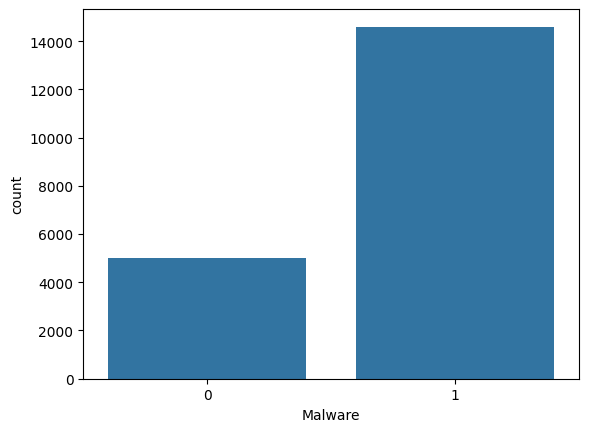

In [4]:
sns.countplot(x='Malware', data=data);

In [5]:
X = data.drop(["Malware"],axis=1)
y = data['Malware'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
models = [
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),

]

In [8]:
model_names = [
    'KNeighborsClassifier',
    'NeuralNetwork',
    'RandomForestClassifier',
]

In [9]:
accuracy_test = []

In [10]:
# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_resampled = X_train
y_resampled = y_train

######-Model => KNeighborsClassifier 
Cross-Validation Scores: [0.98279159 0.98151689 0.98661568 0.98342894 0.98597833 0.98661568
 0.97705545 0.98534098 0.97704082 0.98788265]
Mean CV Accuracy: 0.98343
              Classification_report 
Test Accuracy :  98.80194%  
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       974
           1       0.99      0.99      0.99      2949

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923

             Confusion_matrix 


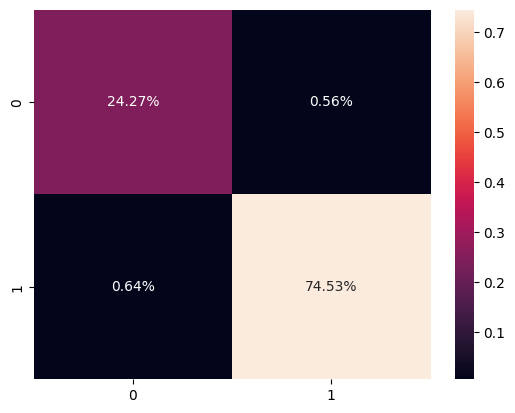

###################- End -###################
######-Model => NeuralNetwork 
Cross-Validation Scores: [0.84639898 0.90885915 0.85787126 0.88973869 0.89866157 0.8374761
 0.81453155 0.82982792 0.89540816 0.8182398 ]
Mean CV Accuracy: 0.85970
              Classification_report 
Test Accuracy :  90.77237%  
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       974
           1       0.95      0.93      0.94      2949

    accuracy                           0.91      3923
   macro avg       0.87      0.88      0.88      3923
weighted avg       0.91      0.91      0.91      3923

             Confusion_matrix 


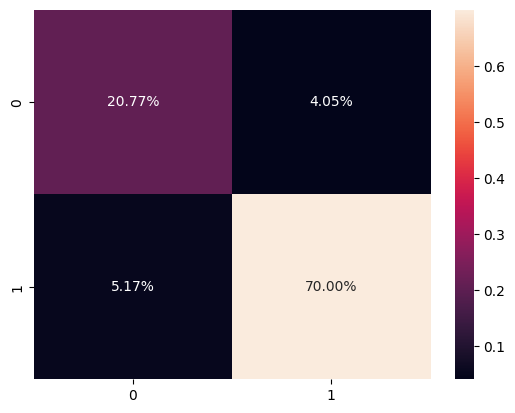

###################- End -###################
######-Model => RandomForestClassifier 
Cross-Validation Scores: [0.99107712 0.98980242 0.99298917 0.99298917 0.99107712 0.99362651
 0.98789038 0.99426386 0.99234694 0.99107143]
Mean CV Accuracy: 0.99171
              Classification_report 
Test Accuracy :  99.38822%  
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       974
           1       0.99      1.00      1.00      2949

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923

             Confusion_matrix 


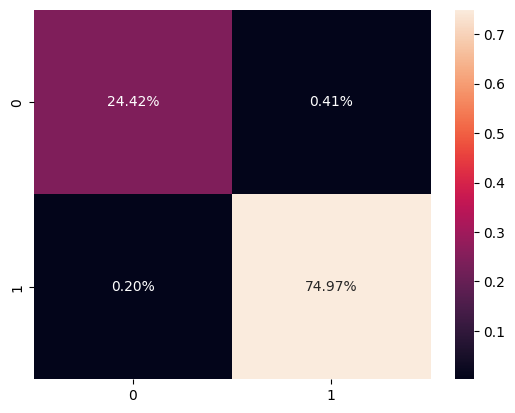

###################- End -###################
Class Distribution After Undersampling:
Malware
1.0    11650
0.0     4038
Name: count, dtype: int64


In [11]:
for model, model_name in zip(models, model_names):
    print('######-Model =>\033[07m {} \033[0m'.format(model_name))
    
    # ใช้ข้อมูลที่ถูกคัดลอกไว้สำหรับการฝึก
    model.fit(X_resampled, y_resampled)
    
    # ทำการทำ cross-validation 
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)  
    
    print('Cross-Validation Scores:', cv_scores)
    print('Mean CV Accuracy: {:.5f}'.format(np.mean(cv_scores)))
    print('\033[01m              Classification_report \033[0m')
    

    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc * 100))
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

undersampled_data = pd.DataFrame(data=np.c_[X_resampled, y_resampled], columns=list(X.columns) + ['Malware'])

class_counts = undersampled_data['Malware'].value_counts()

print('Class Distribution After Undersampling:')
print(class_counts)